In [1]:
import numpy as np
import re
import os
import pickle
import pandas as pd
from PIL import Image
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
os.chdir("/Users/niraliabhani/Documents/lisa/")

In [3]:
# Script variables
RESIZE_IMAGE = True  # resize the images and write to 'resized_images/'
GRAYSCALE = True  # convert image to grayscale? this option is only valid if RESIZE_IMAGE==True
TARGET_W, TARGET_H = 400, 260  # 1.74 is weighted avg ratio, but 1.65 aspect ratio is close enough (1.65 was for stop signs)

In [4]:
pwd

'/Users/niraliabhani/Documents/lisa'

In [5]:
# First define mapping from sign name string to integer label

sign_list = ['addedLane', 'curveRight', 'dip', 'intersection', 'laneEnds', 'merge', 'pedestrianCrossing', 'signalAhead', 'slow', 'stopAhead',
            'thruMergeLeft', 'thruMergeRight', 'turnLeft', 'turnRight','yieldAhead']
sign_map = {'addedLane': 1, 'curveRight': 2, 'dip': 3, 'intersection':4, 'laneEnds':5, 'merge':6, 'pedestrianCrossing':7, 'signalAhead':8, 'slow':9, 'stopAhead':10,
'thruMergeLeft':11, 'thruMergeRight':12, 'turnLeft':13, 'turnRight':14, 'yieldAhead':15}

#f = pd.DataFrame.from_dict(sign_map, orient="index")
#f.to_csv('sign_map.csv')

# Create raw data dictionary
data_raw = {}

# create a list to feed all the information from mergedAnnotation file
merged_annotations = []
with open('./mergeAnnotation.csv', 'r') as f:
    for line in f:
        line = line[:-1]  # strip trailing newline
        merged_annotations.append(line)

# Create pickle file to represent dataset information
image_files = os.listdir('./annotations')
for image_file in image_files:
    # Find box coordinates for all signs in this image
    class_list = []
    box_coords_list = []
    for line in merged_annotations:
        if re.search(image_file, line):
            fields = line.split(';')

            # Get sign name and assign class label
            sign_name = fields[1]
            
            if sign_name not in sign_list:
                continue  # ignore signs that are not in the list
            sign_class = sign_map[sign_name]
            class_list.append(sign_class)

            # Resize image, get rescaled box coordinates
            box_coords = np.array([int(x) for x in fields[2:6]])

            if RESIZE_IMAGE:
                # Resize the images and write to 'resized_images/'
                image = Image.open('annotations/' + image_file)
                orig_w, orig_h = image.size

                if GRAYSCALE:
                    image = image.convert('L')  # 8-bit grayscale
                image = image.resize((TARGET_W, TARGET_H), Image.LANCZOS)  # downsampling filter

                resized_dir = 'resized_images_%dx%d/' % (TARGET_W, TARGET_H)
                if not os.path.exists(resized_dir):
                    os.makedirs(resized_dir)

                image.save(os.path.join(resized_dir, image_file))

                # Rescale box coordinates
                x_scale = TARGET_W / orig_w
                y_scale = TARGET_H / orig_h

                ulc_x, ulc_y, lrc_x, lrc_y = box_coords
                new_box_coords = (ulc_x * x_scale, ulc_y * y_scale, lrc_x * x_scale, lrc_y * y_scale)
                new_box_coords = [round(x) for x in new_box_coords]
                box_coords = np.array(new_box_coords)

            box_coords_list.append(box_coords)

    if len(class_list) == 0:
        continue  # ignore images with no signs-of-interest
    class_list = np.array(class_list)
    box_coords_list = np.array(box_coords_list)

    # Create the list of dicts
    the_list = []
    for i in range(len(box_coords_list)):
        d = {'class': class_list[i], 'box_coords': box_coords_list[i]}
        print (d)
        the_list.append(d)

    data_raw[image_file] = the_list

with open('data_raw_%dx%d.p' % (TARGET_W, TARGET_H), 'wb') as f:
    pickle.dump(data_raw, f)

{'class': 14, 'box_coords': array([249, 153, 270, 172])}
{'class': 5, 'box_coords': array([272,  77, 288,  97])}
{'class': 1, 'box_coords': array([252, 152, 273, 170])}
{'class': 7, 'box_coords': array([263,  80, 283, 105])}
{'class': 1, 'box_coords': array([ 77, 147, 104, 171])}
{'class': 7, 'box_coords': array([249,  77, 262,  95])}
{'class': 8, 'box_coords': array([263,  92, 275, 107])}
{'class': 8, 'box_coords': array([191,  89, 200, 101])}
{'class': 7, 'box_coords': array([326, 138, 347, 165])}
{'class': 7, 'box_coords': array([227,  81, 234,  91])}
{'class': 15, 'box_coords': array([326,  86, 364, 121])}
{'class': 10, 'box_coords': array([222,  22, 242,  40])}
{'class': 7, 'box_coords': array([327,  62, 339,  79])}
{'class': 8, 'box_coords': array([363,  18, 382,  36])}
{'class': 7, 'box_coords': array([264, 165, 284, 184])}
{'class': 5, 'box_coords': array([ 32, 153,  50, 174])}
{'class': 10, 'box_coords': array([241,   9, 273,  36])}
{'class': 8, 'box_coords': array([ 95, 121, 

{'class': 8, 'box_coords': array([254,  97, 264, 110])}
{'class': 8, 'box_coords': array([156, 101, 167, 114])}
{'class': 6, 'box_coords': array([55, 60, 81, 98])}
{'class': 8, 'box_coords': array([ 55, 168,  73, 186])}
{'class': 8, 'box_coords': array([101,   1, 131,  28])}
{'class': 8, 'box_coords': array([352,  26, 381,  52])}
{'class': 7, 'box_coords': array([356,  89, 376, 115])}
{'class': 8, 'box_coords': array([250, 125, 263, 135])}
{'class': 1, 'box_coords': array([329,  80, 351, 110])}
{'class': 7, 'box_coords': array([266,  88, 279, 105])}
{'class': 8, 'box_coords': array([259, 147, 278, 163])}
{'class': 8, 'box_coords': array([290, 159, 307, 175])}
{'class': 7, 'box_coords': array([280,  75, 294,  93])}
{'class': 5, 'box_coords': array([241,  64, 252,  84])}
{'class': 7, 'box_coords': array([218,  82, 227,  94])}
{'class': 2, 'box_coords': array([325,  65, 345,  91])}
{'class': 8, 'box_coords': array([249,  93, 257, 103])}
{'class': 7, 'box_coords': array([188,  99, 203, 119

{'class': 3, 'box_coords': array([276,   1, 304,  25])}
{'class': 7, 'box_coords': array([251,  89, 263, 104])}
{'class': 10, 'box_coords': array([338,  87, 346,  98])}
{'class': 5, 'box_coords': array([218,  16, 234,  37])}
{'class': 1, 'box_coords': array([128,  68, 155, 103])}
{'class': 10, 'box_coords': array([122, 145, 145, 167])}
{'class': 8, 'box_coords': array([262, 127, 289, 153])}
{'class': 8, 'box_coords': array([256,  90, 269, 107])}
{'class': 8, 'box_coords': array([144,  93, 157, 111])}
{'class': 6, 'box_coords': array([257,  73, 280, 102])}
{'class': 7, 'box_coords': array([317,  59, 347,  99])}
{'class': 7, 'box_coords': array([210, 105, 218, 115])}
{'class': 8, 'box_coords': array([203, 158, 220, 173])}
{'class': 5, 'box_coords': array([ 93, 100, 109, 121])}
{'class': 8, 'box_coords': array([198, 120, 206, 130])}
{'class': 6, 'box_coords': array([325,  55, 345,  80])}
{'class': 6, 'box_coords': array([348,  74, 371, 105])}
{'class': 14, 'box_coords': array([287, 106, 2

{'class': 10, 'box_coords': array([235,  12, 264,  35])}
{'class': 1, 'box_coords': array([296,  50, 329,  92])}
{'class': 8, 'box_coords': array([226, 112, 233, 121])}
{'class': 8, 'box_coords': array([171, 118, 179, 127])}
{'class': 8, 'box_coords': array([197, 167, 210, 179])}
{'class': 8, 'box_coords': array([136, 128, 150, 140])}
{'class': 8, 'box_coords': array([279, 124, 292, 136])}
{'class': 7, 'box_coords': array([363,  48, 381,  72])}
{'class': 7, 'box_coords': array([268,  92, 277, 103])}
{'class': 8, 'box_coords': array([284,  56, 306,  86])}
{'class': 7, 'box_coords': array([319, 147, 348, 173])}
{'class': 2, 'box_coords': array([346,  79, 361,  99])}
{'class': 7, 'box_coords': array([222,  77, 229,  87])}
{'class': 15, 'box_coords': array([306,  96, 340, 126])}
{'class': 8, 'box_coords': array([  9,  70,  54, 112])}
{'class': 7, 'box_coords': array([319,  71, 329,  84])}
{'class': 8, 'box_coords': array([363,  98, 382, 116])}
{'class': 5, 'box_coords': array([231,  79, 24

{'class': 8, 'box_coords': array([188,  95, 200, 109])}
{'class': 8, 'box_coords': array([299,  87, 308,  98])}
{'class': 8, 'box_coords': array([250, 120, 266, 134])}
{'class': 7, 'box_coords': array([261,  92, 272, 108])}
{'class': 8, 'box_coords': array([ 82, 173,  98, 188])}
{'class': 8, 'box_coords': array([118,   2, 144,  25])}
{'class': 8, 'box_coords': array([328,  24, 355,  46])}
{'class': 7, 'box_coords': array([310,  56, 339,  94])}
{'class': 6, 'box_coords': array([142,  80, 158, 100])}
{'class': 5, 'box_coords': array([320,  67, 339,  91])}
{'class': 5, 'box_coords': array([233,  78, 246,  95])}
{'class': 6, 'box_coords': array([211, 160, 226, 173])}
{'class': 14, 'box_coords': array([275,  89, 285, 102])}
{'class': 7, 'box_coords': array([263,  82, 279, 103])}
{'class': 8, 'box_coords': array([270,  89, 281, 103])}
{'class': 8, 'box_coords': array([122,  91, 132, 104])}
{'class': 8, 'box_coords': array([219,  85, 223,  90])}
{'class': 7, 'box_coords': array([241, 123, 252

{'class': 1, 'box_coords': array([316,  58, 349, 100])}
{'class': 7, 'box_coords': array([247, 153, 261, 166])}
{'class': 14, 'box_coords': array([196,  93, 208, 107])}
{'class': 8, 'box_coords': array([236,  82, 250, 100])}
{'class': 8, 'box_coords': array([123,  79, 137,  97])}
{'class': 7, 'box_coords': array([289,  52, 313,  83])}
{'class': 5, 'box_coords': array([233,  78, 246,  95])}
{'class': 14, 'box_coords': array([288, 104, 296, 115])}
{'class': 8, 'box_coords': array([261, 128, 271, 136])}
{'class': 8, 'box_coords': array([216, 153, 235, 171])}
{'class': 5, 'box_coords': array([ 90,  99, 107, 121])}
{'class': 8, 'box_coords': array([207, 120, 216, 131])}
{'class': 8, 'box_coords': array([270, 110, 305, 142])}
{'class': 8, 'box_coords': array([273,  86, 288, 106])}
{'class': 8, 'box_coords': array([135,  88, 151, 107])}
{'class': 7, 'box_coords': array([360,  33, 398,  85])}
{'class': 7, 'box_coords': array([214,  98, 223, 109])}
{'class': 6, 'box_coords': array([250,  80, 27

{'class': 1, 'box_coords': array([122,  66, 147, 100])}
{'class': 7, 'box_coords': array([236,  96, 246, 109])}
{'class': 7, 'box_coords': array([288,  69, 300,  84])}
{'class': 7, 'box_coords': array([239,  84, 252, 100])}
{'class': 5, 'box_coords': array([229,  57, 238,  69])}
{'class': 8, 'box_coords': array([275,  71, 295,  98])}
{'class': 8, 'box_coords': array([235,  93, 248, 110])}
{'class': 7, 'box_coords': array([156,  88, 164,  98])}
{'class': 8, 'box_coords': array([245,  86, 258, 103])}
{'class': 8, 'box_coords': array([332,  49, 357,  81])}
{'class': 6, 'box_coords': array([150,  78, 171, 107])}
{'class': 10, 'box_coords': array([316,  24, 352,  70])}
{'class': 13, 'box_coords': array([250,  80, 261,  95])}
{'class': 9, 'box_coords': array([251,  95, 261, 107])}
{'class': 7, 'box_coords': array([243,  85, 254,  98])}
{'class': 7, 'box_coords': array([236,  88, 247, 104])}
{'class': 8, 'box_coords': array([234, 154, 253, 171])}
{'class': 7, 'box_coords': array([323,  59, 37

{'class': 7, 'box_coords': array([237,  93, 249, 109])}
{'class': 10, 'box_coords': array([303, 133, 336, 165])}
{'class': 7, 'box_coords': array([265,  74, 279,  92])}
{'class': 1, 'box_coords': array([259,  86, 278, 109])}
{'class': 8, 'box_coords': array([221,  94, 229, 105])}
{'class': 7, 'box_coords': array([ 76, 105,  90, 124])}
{'class': 14, 'box_coords': array([239,  84, 254, 102])}
{'class': 7, 'box_coords': array([146,  95, 158, 110])}
{'class': 10, 'box_coords': array([166,  82, 178,  98])}
{'class': 5, 'box_coords': array([271,  56, 286,  77])}
{'class': 1, 'box_coords': array([217,  93, 228, 109])}
{'class': 8, 'box_coords': array([230, 159, 248, 174])}
{'class': 7, 'box_coords': array([234,  89, 245, 104])}
{'class': 7, 'box_coords': array([242,  87, 252, 100])}
{'class': 7, 'box_coords': array([305,  71, 349, 107])}
{'class': 10, 'box_coords': array([302,  41, 334,  82])}
{'class': 6, 'box_coords': array([164,  81, 182, 106])}
{'class': 13, 'box_coords': array([253,  76,

{'class': 8, 'box_coords': array([318,  93, 330, 109])}
{'class': 6, 'box_coords': array([229, 132, 253, 159])}
{'class': 1, 'box_coords': array([221, 100, 227, 108])}
{'class': 6, 'box_coords': array([291, 148, 315, 169])}
{'class': 8, 'box_coords': array([293, 144, 316, 164])}
{'class': 7, 'box_coords': array([220, 106, 229, 119])}
{'class': 7, 'box_coords': array([243,  96, 252, 108])}
{'class': 6, 'box_coords': array([146, 126, 179, 162])}
{'class': 5, 'box_coords': array([281,  75, 300, 100])}
{'class': 5, 'box_coords': array([111,  58, 132,  84])}
{'class': 7, 'box_coords': array([354,  81, 368, 100])}
{'class': 8, 'box_coords': array([272, 106, 278, 115])}
{'class': 15, 'box_coords': array([277, 147, 301, 168])}
{'class': 7, 'box_coords': array([132,  87, 143, 101])}
{'class': 7, 'box_coords': array([213, 114, 234, 132])}
{'class': 7, 'box_coords': array([213,  97, 223, 109])}
{'class': 8, 'box_coords': array([230,  83, 241,  98])}
{'class': 6, 'box_coords': array([238, 145, 264

{'class': 5, 'box_coords': array([232,  82, 241,  92])}
{'class': 1, 'box_coords': array([203, 100, 211, 109])}
{'class': 14, 'box_coords': array([249,  79, 265,  99])}
{'class': 8, 'box_coords': array([256, 145, 283, 168])}
{'class': 7, 'box_coords': array([231,  90, 242, 105])}
{'class': 8, 'box_coords': array([139, 116, 158, 132])}
{'class': 8, 'box_coords': array([322, 115, 334, 127])}
{'class': 8, 'box_coords': array([126, 109, 143, 124])}
{'class': 8, 'box_coords': array([293,  75, 308,  95])}
{'class': 8, 'box_coords': array([72, 79, 88, 99])}
{'class': 8, 'box_coords': array([212,  78, 218,  85])}
{'class': 7, 'box_coords': array([291, 123, 305, 134])}
{'class': 7, 'box_coords': array([295,  70, 308,  87])}
{'class': 1, 'box_coords': array([329,  84, 345, 104])}
{'class': 10, 'box_coords': array([231,  85, 243,  99])}
{'class': 7, 'box_coords': array([239,  88, 248,  99])}
{'class': 8, 'box_coords': array([278, 110, 303, 134])}
{'class': 5, 'box_coords': array([104, 100, 131, 1

{'class': 13, 'box_coords': array([290,  63, 311,  90])}
{'class': 9, 'box_coords': array([293,  90, 310, 112])}
{'class': 1, 'box_coords': array([295,  34, 331,  80])}
{'class': 7, 'box_coords': array([266,  83, 280, 102])}
{'class': 7, 'box_coords': array([18, 83, 26, 94])}
{'class': 6, 'box_coords': array([270,  88, 289, 113])}
{'class': 7, 'box_coords': array([332,  77, 359, 112])}
{'class': 10, 'box_coords': array([298, 113, 323, 134])}
{'class': 7, 'box_coords': array([298,  66, 322,  97])}
{'class': 7, 'box_coords': array([265,  83, 275,  97])}
{'class': 7, 'box_coords': array([245,  94, 255, 107])}
{'class': 10, 'box_coords': array([217,  43, 226,  54])}
{'class': 6, 'box_coords': array([272,  80, 289, 102])}
{'class': 15, 'box_coords': array([291, 138, 319, 162])}
{'class': 7, 'box_coords': array([246, 106, 268, 126])}
{'class': 1, 'box_coords': array([297, 109, 355, 160])}
{'class': 10, 'box_coords': array([216,  45, 224,  55])}
{'class': 7, 'box_coords': array([246,  92, 258

{'class': 15, 'box_coords': array([355,  61, 375,  86])}
{'class': 7, 'box_coords': array([238, 101, 245, 110])}
{'class': 8, 'box_coords': array([263,  88, 279, 108])}
{'class': 8, 'box_coords': array([110,  72, 126,  93])}
{'class': 7, 'box_coords': array([ 49, 107,  63, 125])}
{'class': 8, 'box_coords': array([359,  34, 388,  72])}
{'class': 7, 'box_coords': array([285, 138, 306, 155])}
{'class': 7, 'box_coords': array([312,  41, 331,  65])}
{'class': 8, 'box_coords': array([108,  82, 127, 107])}
{'class': 8, 'box_coords': array([304,  72, 318,  91])}
{'class': 1, 'box_coords': array([320,  71, 339,  96])}
{'class': 7, 'box_coords': array([332, 104, 343, 118])}
{'class': 8, 'box_coords': array([272, 101, 280, 112])}
{'class': 1, 'box_coords': array([269,  74, 288,  98])}
{'class': 7, 'box_coords': array([277,  69, 292,  89])}
{'class': 5, 'box_coords': array([175,  87, 187, 102])}
{'class': 1, 'box_coords': array([191,  97, 198, 108])}
{'class': 7, 'box_coords': array([245,  67, 257

{'class': 6, 'box_coords': array([260, 131, 295, 160])}
{'class': 7, 'box_coords': array([184, 118, 202, 133])}
{'class': 7, 'box_coords': array([146,  94, 157, 108])}
{'class': 6, 'box_coords': array([311,  45, 344,  88])}
{'class': 7, 'box_coords': array([325,  53, 346,  81])}
{'class': 1, 'box_coords': array([272,  97, 285, 114])}
{'class': 7, 'box_coords': array([289,  62, 301,  76])}
{'class': 7, 'box_coords': array([273, 109, 286, 126])}
{'class': 7, 'box_coords': array([231,  85, 243, 101])}
{'class': 6, 'box_coords': array([279,  76, 300, 104])}
{'class': 1, 'box_coords': array([340, 127, 376, 159])}
{'class': 10, 'box_coords': array([314,  80, 365, 127])}
{'class': 5, 'box_coords': array([266,  40, 282,  70])}
{'class': 7, 'box_coords': array([228,  74, 239,  89])}
{'class': 6, 'box_coords': array([274, 138, 295, 160])}
{'class': 6, 'box_coords': array([270, 156, 288, 172])}
{'class': 1, 'box_coords': array([228,  96, 237, 108])}
{'class': 5, 'box_coords': array([107,  73, 116

{'class': 7, 'box_coords': array([298,  90, 317, 114])}
{'class': 7, 'box_coords': array([284,  67, 294,  80])}
{'class': 7, 'box_coords': array([339,  61, 358,  86])}
{'class': 7, 'box_coords': array([243,  96, 251, 106])}
{'class': 7, 'box_coords': array([256, 101, 281, 121])}
{'class': 8, 'box_coords': array([212, 134, 245, 165])}
{'class': 7, 'box_coords': array([142,  84, 159, 108])}
{'class': 14, 'box_coords': array([295,  64, 318,  95])}
{'class': 2, 'box_coords': array([360,  47, 389,  83])}
{'class': 15, 'box_coords': array([250, 160, 268, 176])}
{'class': 8, 'box_coords': array([215, 181, 224, 190])}
{'class': 8, 'box_coords': array([272, 104, 282, 118])}
{'class': 8, 'box_coords': array([280,  90, 293, 106])}
{'class': 7, 'box_coords': array([312,  68, 329,  90])}
{'class': 9, 'box_coords': array([257,  98, 277, 117])}
{'class': 7, 'box_coords': array([230, 101, 240, 114])}
{'class': 1, 'box_coords': array([291,  79, 307, 100])}
{'class': 7, 'box_coords': array([241,  88, 25

{'class': 7, 'box_coords': array([34, 72, 43, 83])}
{'class': 6, 'box_coords': array([  2,  89,  54, 147])}
{'class': 8, 'box_coords': array([235,  93, 248, 110])}
{'class': 6, 'box_coords': array([159, 123, 195, 160])}
{'class': 8, 'box_coords': array([207,  80, 220,  95])}
{'class': 15, 'box_coords': array([322, 122, 362, 157])}
{'class': 8, 'box_coords': array([206, 107, 229, 129])}
{'class': 1, 'box_coords': array([246,  70, 263,  92])}
{'class': 7, 'box_coords': array([270,  76, 289, 101])}
{'class': 7, 'box_coords': array([203, 103, 210, 112])}
{'class': 7, 'box_coords': array([266,  93, 293, 116])}
{'class': 6, 'box_coords': array([339,  50, 368,  89])}
{'class': 6, 'box_coords': array([224,  99, 232, 108])}
{'class': 1, 'box_coords': array([162,  90, 175, 107])}
{'class': 1, 'box_coords': array([267, 147, 293, 170])}
{'class': 8, 'box_coords': array([235,  96, 263, 122])}
{'class': 15, 'box_coords': array([337, 113, 384, 155])}
{'class': 7, 'box_coords': array([259,  84, 275, 1

{'class': 7, 'box_coords': array([324, 142, 340, 162])}
{'class': 7, 'box_coords': array([195,  72, 209,  89])}
{'class': 7, 'box_coords': array([243,  99, 252, 110])}
{'class': 7, 'box_coords': array([275,  99, 281, 107])}
{'class': 8, 'box_coords': array([ 62, 153,  81, 171])}
{'class': 8, 'box_coords': array([247, 149, 268, 167])}
{'class': 1, 'box_coords': array([238,  87, 249, 101])}
{'class': 8, 'box_coords': array([168,  93, 180, 110])}
{'class': 8, 'box_coords': array([297,  85, 307,  98])}
{'class': 8, 'box_coords': array([169, 147, 189, 165])}
{'class': 7, 'box_coords': array([315, 126, 343, 150])}
{'class': 6, 'box_coords': array([338, 141, 352, 157])}
{'class': 7, 'box_coords': array([366,  92, 399, 120])}
{'class': 7, 'box_coords': array([131,  98, 139, 107])}
{'class': 8, 'box_coords': array([291, 100, 304, 118])}
{'class': 7, 'box_coords': array([291,  32, 312,  59])}
{'class': 15, 'box_coords': array([263, 152, 283, 171])}
{'class': 7, 'box_coords': array([297,  46, 318

{'class': 6, 'box_coords': array([245, 141, 274, 165])}
{'class': 6, 'box_coords': array([312, 136, 331, 154])}
{'class': 7, 'box_coords': array([253, 115, 265, 128])}
{'class': 7, 'box_coords': array([320,  45, 339,  69])}
{'class': 6, 'box_coords': array([336,  51, 372,  97])}
{'class': 1, 'box_coords': array([257, 150, 281, 171])}
{'class': 8, 'box_coords': array([268,  99, 293, 122])}
{'class': 7, 'box_coords': array([202, 118, 221, 134])}
{'class': 6, 'box_coords': array([287, 118, 330, 156])}
{'class': 15, 'box_coords': array([271, 153, 293, 171])}
{'class': 7, 'box_coords': array([243,  17, 264,  34])}
{'class': 10, 'box_coords': array([284,  39, 312,  75])}
{'class': 7, 'box_coords': array([353,  17, 380,  37])}
{'class': 8, 'box_coords': array([262, 118, 278, 132])}
{'class': 8, 'box_coords': array([113, 126, 128, 139])}
{'class': 1, 'box_coords': array([248, 107, 257, 119])}
{'class': 6, 'box_coords': array([246,  86, 260, 104])}
{'class': 8, 'box_coords': array([217,  95, 22

{'class': 10, 'box_coords': array([ 96, 165, 115, 183])}
{'class': 15, 'box_coords': array([272, 146, 297, 168])}
{'class': 13, 'box_coords': array([235,  88, 244, 100])}
{'class': 8, 'box_coords': array([201, 169, 216, 181])}
{'class': 1, 'box_coords': array([276,  62, 302,  95])}
{'class': 2, 'box_coords': array([328,  84, 342, 102])}
{'class': 1, 'box_coords': array([206, 164, 223, 178])}
{'class': 7, 'box_coords': array([332, 143, 361, 172])}
{'class': 8, 'box_coords': array([232, 131, 245, 141])}
{'class': 8, 'box_coords': array([ 22,  69,  64, 108])}
{'class': 8, 'box_coords': array([260,  72, 276,  93])}
{'class': 3, 'box_coords': array([248,  75, 262,  95])}
{'class': 8, 'box_coords': array([ 60,  89,  93, 120])}
{'class': 7, 'box_coords': array([38, 71, 48, 84])}
{'class': 7, 'box_coords': array([171,  95, 180, 106])}
{'class': 7, 'box_coords': array([292, 119, 309, 133])}
{'class': 14, 'box_coords': array([264, 112, 277, 129])}
{'class': 6, 'box_coords': array([321,  69, 338,

{'class': 7, 'box_coords': array([300,  61, 327,  96])}
{'class': 8, 'box_coords': array([296,  90, 332, 120])}
{'class': 8, 'box_coords': array([278,  83, 290, 100])}
{'class': 8, 'box_coords': array([100,  87, 112, 103])}
{'class': 8, 'box_coords': array([215,  82, 220,  88])}
{'class': 1, 'box_coords': array([265,  87, 277, 103])}
{'class': 8, 'box_coords': array([111,  39, 139,  76])}
{'class': 7, 'box_coords': array([361,  33, 386,  64])}
{'class': 7, 'box_coords': array([301, 117, 319, 133])}
{'class': 7, 'box_coords': array([173,  97, 182, 109])}
{'class': 5, 'box_coords': array([233,  78, 246,  95])}
{'class': 6, 'box_coords': array([320,  71, 334,  90])}
{'class': 14, 'box_coords': array([258, 109, 272, 127])}
{'class': 7, 'box_coords': array([42, 72, 52, 85])}
{'class': 3, 'box_coords': array([254,  72, 270,  94])}
{'class': 8, 'box_coords': array([ 45,  85,  82, 118])}
{'class': 1, 'box_coords': array([207, 163, 226, 178])}
{'class': 2, 'box_coords': array([314,  90, 326, 10

{'class': 10, 'box_coords': array([315,  84, 328, 100])}
{'class': 1, 'box_coords': array([308,  72, 332, 105])}
{'class': 7, 'box_coords': array([ 43,  93,  52, 104])}
{'class': 8, 'box_coords': array([309, 133, 345, 164])}
{'class': 6, 'box_coords': array([275,  70, 296,  97])}
{'class': 7, 'box_coords': array([236,  63, 253,  84])}
{'class': 7, 'box_coords': array([268,  79, 286, 102])}
{'class': 8, 'box_coords': array([241, 104, 247, 113])}
{'class': 8, 'box_coords': array([238,  79, 253,  99])}
{'class': 8, 'box_coords': array([118,  76, 133,  96])}
{'class': 7, 'box_coords': array([261, 100, 273, 116])}
{'class': 7, 'box_coords': array([327,  41, 355,  77])}
{'class': 7, 'box_coords': array([298, 119, 316, 134])}
{'class': 8, 'box_coords': array([61, 73, 81, 98])}
{'class': 8, 'box_coords': array([284,  62, 304,  86])}
{'class': 6, 'box_coords': array([150,  84, 163, 103])}
{'class': 7, 'box_coords': array([269, 119, 286, 133])}
{'class': 6, 'box_coords': array([228,  93, 240, 10

{'class': 7, 'box_coords': array([247,  72, 259,  88])}
{'class': 1, 'box_coords': array([238, 127, 264, 154])}
{'class': 8, 'box_coords': array([248, 130, 258, 139])}
{'class': 8, 'box_coords': array([164, 132, 174, 141])}
{'class': 10, 'box_coords': array([257,  51, 271,  71])}
{'class': 8, 'box_coords': array([ 40, 131,  72, 158])}
{'class': 8, 'box_coords': array([248, 105, 255, 115])}
{'class': 8, 'box_coords': array([280, 164, 295, 178])}
{'class': 7, 'box_coords': array([284,  81, 296,  99])}
{'class': 8, 'box_coords': array([250,  70, 270,  94])}
{'class': 8, 'box_coords': array([ 92,  67, 111,  93])}
{'class': 8, 'box_coords': array([243, 108, 250, 117])}
{'class': 6, 'box_coords': array([232,  88, 246, 106])}
{'class': 9, 'box_coords': array([266,  87, 279, 104])}
{'class': 14, 'box_coords': array([171, 100, 179, 110])}
{'class': 7, 'box_coords': array([361,  87, 394, 116])}
{'class': 8, 'box_coords': array([333,  37, 363,  77])}
{'class': 8, 'box_coords': array([248, 152, 27

{'class': 10, 'box_coords': array([113, 175, 129, 190])}
{'class': 15, 'box_coords': array([284, 136, 315, 164])}
{'class': 7, 'box_coords': array([280,  31, 312,  72])}
{'class': 13, 'box_coords': array([231,  91, 239, 102])}
{'class': 7, 'box_coords': array([293,  65, 309,  85])}
{'class': 2, 'box_coords': array([295,  68, 314,  93])}
{'class': 1, 'box_coords': array([ 68, 127, 103, 160])}
{'class': 1, 'box_coords': array([273,  73, 293,  97])}
{'class': 1, 'box_coords': array([308,  88, 323, 107])}
{'class': 7, 'box_coords': array([73, 64, 84, 78])}
{'class': 14, 'box_coords': array([249,  50, 266,  74])}
{'class': 6, 'box_coords': array([343,  60, 365,  88])}
{'class': 8, 'box_coords': array([341,  71, 366, 102])}
{'class': 5, 'box_coords': array([233,  78, 246,  95])}
{'class': 7, 'box_coords': array([159,  95, 171, 109])}
{'class': 7, 'box_coords': array([324, 106, 348, 126])}
{'class': 8, 'box_coords': array([230,  96, 239, 107])}
{'class': 7, 'box_coords': array([290,  73, 309,

{'class': 14, 'box_coords': array([272, 115, 299, 137])}


In [6]:
# DEFAULT_BOXES = ((x1_offset, y1_offset, x2_offset, y2_offset), (...), ...)
# Offset is relative to upper-left-corner and lower-right-corner of the feature map cell
DEFAULT_BOXES = ((-0.5, -0.5, 0.5, 0.5), (0.2, 0.2, -0.2, -0.2), (-0.8, -0.2, 0.8, 0.2), (-0.2, -0.8, 0.2, 0.8))
NUM_DEFAULT_BOXES = len(DEFAULT_BOXES)

# Constants 
NUM_CLASSES = 16  # 15 signs + 1 background class
NUM_CHANNELS = 1  # Use as grayscale = 1, RGB = 3
NUM_PRED_CONF = NUM_DEFAULT_BOXES * NUM_CLASSES  # number of class predictions per feature map cell
NUM_PRED_LOC  = NUM_DEFAULT_BOXES * 4  # number of localization regression predictions per feature map cell

# Bounding box parameters
IOU_THRESH = 0.5  # match ground-truth box to default boxes exceeding this IOU threshold, during data prep
NMS_IOU_THRESH = 0.2  # IOU threshold for non-max suppression

# Negatives-to-positives ratio used to filter training data
NEG_POS_RATIO = 5  # negative:positive = NEG_POS_RATIO:1

# Class confidence threshold to count as detection
CONF_THRESH = 0.9

In [7]:
# Model selection and dependent parameters
MODEL = 'AlexNet' 
if MODEL == 'AlexNet':
 
    IMG_H, IMG_W = 260, 400
    FM_SIZES = [[31, 48], [15, 23], [8, 12], [4, 6]] # feature map sizes for SSD hooks via TensorBoard visualization (Height, Width)

else:
    raise NotImplementedError('Model not implemented')


In [8]:
# Model hyper-parameters
#OPT = tf.train.AdadeltaOptimizer()
OPT = tf.train.AdamOptimizer()
REG_SCALE = 1e-2  # L2 regularization strength
LOC_LOSS_WEIGHT = 1.  # weight of localization loss: loss = conf_loss + LOC_LOSS_WEIGHT * loc_loss

# Training process
RESUME = False # resume training from previously saved model?
NUM_EPOCH = 10
BATCH_SIZE = 32  # batch size for training (relatively small as it doesn't fits on GPU's memory if its bigger than 32)
TEST_SIZE = 0.20  # ratio of total training set to use as test set
SAVE_MODEL = True  # save trained model
MODEL_SAVE_PATH = 'model.ckpt'  # where to save trained model

In [9]:
def calc_iou(box_a, box_b):
# Calculate intersection, i.e. area of overlap between the 2 boxes (could be 0 as well)
    x_overlap = max(0, min(box_a[2], box_b[2]) - max(box_a[0], box_b[0]))
    y_overlap = max(0, min(box_a[3], box_b[3]) - max(box_a[1], box_b[1]))
    intersection = x_overlap * y_overlap

    # Calculate union
    area_box_a = (box_a[2] - box_a[0]) * (box_a[3] - box_a[1])
    area_box_b = (box_b[2] - box_b[0]) * (box_b[3] - box_b[1])
    union = area_box_a + area_box_b - intersection

    iou = intersection / union
    return iou

In [10]:
def find_gt_boxes(raw_data, image_file):
    # Pre-process ground-truth data
    # Convert absolute coordinates to relative coordinates ranging from 0 to 1
    # Read the sign class label (note background class label is 0, sign labels are ints >=1)
    signs_data = raw_data[image_file]

    signs_class = []
    signs_box_coords = []  # relative coordinates
    for sign_data in signs_data:
        # Find class label
        sign_class = sign_data['class']
        signs_class.append(sign_class)

        # Calculate relative coordinates
        # (x1, y1, x2, y2), where 1 denotes upper left corner, 2 denotes lower right corner
        abs_box_coords = sign_data['box_coords']
        scale = np.array([IMG_W, IMG_H, IMG_W, IMG_H])
        box_coords = np.array(abs_box_coords) / scale
        signs_box_coords.append(box_coords)

    # Initialize y_true to all 0s (0 -> background)
    y_true_len = 0
    for fm_size in FM_SIZES:
        y_true_len += fm_size[0] * fm_size[1] * NUM_DEFAULT_BOXES
    y_true_conf = np.zeros(y_true_len)
    y_true_loc = np.zeros(y_true_len * 4)

    # For each GT box, for each feature map, for each feature map cell, for each default box:
    # 1) Calculate the Jaccard overlap (IOU) and annotate the class label
    # 2) Count how many box matches we got
    # 3) If we got a match, calculate normalized box coordinates and update y_true_loc
    match_counter = 0
    for i, gt_box_coords in enumerate(signs_box_coords):
        y_true_idx = 0
        #for fm_idx, fm_size in enumerate(FM_SIZES):
        for fm_size in FM_SIZES:
            fm_h, fm_w = fm_size  # feature map height and width
            for row in range(fm_h):
                for col in range(fm_w):
                    for db in DEFAULT_BOXES:
                        # Calculate relative box coordinates for this default box
                        x1_offset, y1_offset, x2_offset, y2_offset = db
                        abs_db_box_coords = np.array([
                            max(0, col + x1_offset),
                            max(0, row + y1_offset),
                            min(fm_w, col+1 + x2_offset),
                            min(fm_h, row+1 + y2_offset)
                        ])
                        scale = np.array([fm_w, fm_h, fm_w, fm_h])
                        db_box_coords = abs_db_box_coords / scale

                        # Calculate Jaccard overlap (i.e. Intersection Over Union, IOU) of GT box and default box
                        iou = calc_iou(gt_box_coords, db_box_coords)

                        # If box matches, i.e. IOU threshold met
                        if iou >= IOU_THRESH:
                            # Update y_true_conf to reflect we found a match, and increment match_counter
                            y_true_conf[y_true_idx] = signs_class[i]
                            match_counter += 1

                            # Calculate normalized box coordinates and update y_true_loc
                            abs_box_center = np.array([col + 0.5, row + 0.5])  # absolute coordinates of center of feature map cell
                            abs_gt_box_coords = gt_box_coords * scale  # absolute ground truth box coordinates (in feature map grid)
                            norm_box_coords = abs_gt_box_coords - np.concatenate((abs_box_center, abs_box_center))
                            y_true_loc[y_true_idx*4 : y_true_idx*4 + 4] = norm_box_coords

                        y_true_idx += 1

    return y_true_conf, y_true_loc, match_counter

In [11]:
def data_prep(raw_data):
    # Prepare the data by populating y_true appropriately
    data_prep_dict = {}
    for image_file in raw_data.keys():
        # Find groud-truth boxes based on Jaccard overlap,
        # populate y_true_conf (class labels) and y_true_loc (normalized box coordinates)
        y_true_conf, y_true_loc, match_counter = find_gt_boxes(raw_data, image_file)
        # Only want data points where we have matching default boxes
        if match_counter > 0:
            data_prep_dict[image_file] = {'y_true_conf': y_true_conf, 'y_true_loc': y_true_loc}
    return data_prep_dict

In [12]:
with open('data_raw_%sx%s.p' % (IMG_W, IMG_H), 'rb') as f:
        raw_data = pickle.load(f)
print('Preparing data (i.e. matching boxes)')
data_prep = data_prep(raw_data)
with open('data_prep_%sx%s.p' % (IMG_W, IMG_H), 'wb') as f:
    pickle.dump(data_prep, f)
print('Done. Saved prepared data to data_prep_%sx%s.p' % (IMG_W, IMG_H))
print('Total images with >=1 matching box: %d' % len(data_prep.keys()))

Preparing data (i.e. matching boxes)
Done. Saved prepared data to data_prep_400x260.p
Total images with >=1 matching box: 2019


In [13]:
import tensorflow.contrib.slim as slim

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [14]:
def SSDHook(feature_map, hook_id):
    with tf.variable_scope('ssd_hook_' + hook_id):
        # Note we have linear activation (i.e. no activation function)
        net_conf = slim.conv2d(feature_map, NUM_PRED_CONF, [3, 3], activation_fn=None, scope='conv_conf')
        net_conf = tf.contrib.layers.flatten(net_conf)

        net_loc = slim.conv2d(feature_map, NUM_PRED_LOC, [3, 3], activation_fn=None, scope='conv_loc')
        net_loc = tf.contrib.layers.flatten(net_loc)

    return net_conf, net_loc

In [15]:
def ModelHelper(y_pred_conf, y_pred_loc):
    num_total_preds = 0
    for fm_size in FM_SIZES:
        num_total_preds += fm_size[0] * fm_size[1] * NUM_DEFAULT_BOXES
    num_total_preds_conf = num_total_preds * NUM_CLASSES
    num_total_preds_loc  = num_total_preds * 4

    # Input tensors
    y_true_conf = tf.placeholder(tf.int32, [None, num_total_preds], name='y_true_conf')  # classification ground-truth labels
    y_true_loc  = tf.placeholder(tf.float32, [None, num_total_preds_loc], name='y_true_loc')  # localization ground-truth labels
    conf_loss_mask = tf.placeholder(tf.float32, [None, num_total_preds], name='conf_loss_mask')  # 1 mask "bit" per def. box

    # Confidence loss
    logits = tf.reshape(y_pred_conf, [-1, num_total_preds, NUM_CLASSES])
    conf_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_true_conf, logits = logits)
    conf_loss = conf_loss_mask * conf_loss  # "zero-out" the loss for don't-care negatives
    conf_loss = tf.reduce_sum(conf_loss)

    # Localization loss (smooth L1 loss)
    # loc_loss_mask is analagous to conf_loss_mask, except 4 times the size
    diff = y_true_loc - y_pred_loc

    loc_loss_l2 = 0.5 * (diff**2.0)
    loc_loss_l1 = tf.abs(diff) - 0.5
    smooth_l1_condition = tf.less(tf.abs(diff), 1.0)
    loc_loss = tf.where(smooth_l1_condition, loc_loss_l2, loc_loss_l1)

    loc_loss_mask = tf.minimum(y_true_conf, 1)  # have non-zero localization loss only where we have matching ground-truth box
    loc_loss_mask = tf.to_float(loc_loss_mask)
    loc_loss_mask = tf.stack([loc_loss_mask] * 4, axis=2)  # [0, 1, 1] -> [[[0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 1, 1]], ...]
    loc_loss_mask = tf.reshape(loc_loss_mask, [-1, num_total_preds_loc])  # removing the inner-most dimension of above
    loc_loss = loc_loss_mask * loc_loss
    loc_loss = tf.reduce_sum(loc_loss)

    # Weighted average of confidence loss and localization loss
    # Also add regularization loss
    loss = conf_loss + LOC_LOSS_WEIGHT * loc_loss + tf.reduce_sum(slim.losses.get_regularization_losses())
    optimizer = OPT.minimize(loss)

    #reported_loss = loss #tf.reduce_sum(loss, 1)  # DEBUG

    # Class probabilities and predictions
    probs_all = tf.nn.softmax(logits)
    probs, preds_conf = tf.nn.top_k(probs_all)  # take top-1 probability, and the index is the predicted class
    probs = tf.reshape(probs, [-1, num_total_preds])
    preds_conf = tf.reshape(preds_conf, [-1, num_total_preds])

    # Return a dictionary of {tensor_name: tensor_reference}
    ret_dict = {
        'y_true_conf': y_true_conf,
        'y_true_loc': y_true_loc,
        'conf_loss_mask': conf_loss_mask,
        'optimizer': optimizer,
        'conf_loss': conf_loss,
        'loc_loss': loc_loss,
        'loss': loss,
        'probs': probs,
        'preds_conf': preds_conf,
        'preds_loc': y_pred_loc,
    }
    return ret_dict

In [16]:
def AlexNet():
    # Image batch tensor and dropout keep prob placeholders
    x = tf.placeholder(tf.float32, [None, IMG_H, IMG_W, NUM_CHANNELS], name='x')
    is_training = tf.placeholder(tf.bool, name='is_training')

    # Classification and localization predictions
    preds_conf = []  # conf -> classification b/c confidence loss -> classification loss
    preds_loc = []

    # Use batch normalization for all convolution layers

    with slim.arg_scope([slim.conv2d], normalizer_fn=slim.batch_norm, normalizer_params={'is_training': True},\
            weights_regularizer=slim.l2_regularizer(scale=REG_SCALE)):
        net = slim.conv2d(x, 64, [11, 11], 4, padding='VALID', scope='conv1')
        net = slim.max_pool2d(net, [3, 3], 2, scope='pool1')
        net = slim.conv2d(net, 192, [5, 5], scope='conv2')

        net_conf, net_loc = SSDHook(net, 'conv2')
        preds_conf.append(net_conf)
        preds_loc.append(net_loc)

        net = slim.max_pool2d(net, [3, 3], 2, scope='pool2')
        net = slim.conv2d(net, 384, [3, 3], scope='conv3')
        net = slim.conv2d(net, 384, [3, 3], scope='conv4')
        net = slim.conv2d(net, 256, [3, 3], scope='conv5')

        # The following layers added for SSD
        net = slim.conv2d(net, 1024, [3, 3], scope='conv6')
        net = slim.conv2d(net, 1024, [1, 1], scope='conv7')

        net_conf, net_loc = SSDHook(net, 'conv7')
        preds_conf.append(net_conf)
        preds_loc.append(net_loc)

        net = slim.conv2d(net, 256, [1, 1], scope='conv8')
        net = slim.conv2d(net, 512, [3, 3], 2, scope='conv8_2')

        net_conf, net_loc = SSDHook(net, 'conv8_2')
        preds_conf.append(net_conf)
        preds_loc.append(net_loc)

        net = slim.conv2d(net, 128, [1, 1], scope='conv9')
        net = slim.conv2d(net, 256, [3, 3], 2, scope='conv9_2')

        net_conf, net_loc = SSDHook(net, 'conv9_2')
        preds_conf.append(net_conf)
        preds_loc.append(net_loc)

    # Concatenate all predictions together into 1 vector, for both classification and localization predictions
    final_pred_conf = tf.concat(preds_conf, 1)
    final_pred_loc = tf.concat(preds_loc, 1)

    # Return a dictionary of {tensor_name: tensor_reference}
    ret_dict = {
        'x': x,
        'y_pred_conf': final_pred_conf,
        'y_pred_loc': final_pred_loc,
        'is_training': is_training,
    }
    return ret_dict

In [17]:
def SSDModel():
    if MODEL == 'AlexNet':
        model = AlexNet()
    else:
        raise NotImplementedError('Model %s not supported' % MODEL)

    model_helper = ModelHelper(model['y_pred_conf'], model['y_pred_loc'])

    ssd_model = {}
    for k in model.keys():
        ssd_model[k] = model[k]
    for k in model_helper.keys():
        ssd_model[k] = model_helper[k]

    return ssd_model

In [18]:
def nms(y_pred_conf, y_pred_loc, prob):
    # Keep track of boxes for each class
    class_boxes = {}  # class -> [(x1, y1, x2, y2, prob), (...), ...]
    with open('signnames.csv', 'r') as f:
        for line in f:
            cls, _ = line.split(',')
            class_boxes[float(cls)] = []

    # Go through all possible boxes and perform class-based greedy NMS (greedy based on class prediction confidence)
    y_idx = 0
    for fm_size in FM_SIZES:
        fm_h, fm_w = fm_size  # feature map height and width
        for row in range(fm_h):
            for col in range(fm_w):
                for db in DEFAULT_BOXES:
                    # Only perform calculations if class confidence > CONF_THRESH and not background class
                    if prob[y_idx] > CONF_THRESH and y_pred_conf[y_idx] > 0.:
                        # Calculate absolute coordinates of predicted bounding box
                        xc, yc = col + 0.5, row + 0.5  # center of current feature map cell
                        center_coords = np.array([xc, yc, xc, yc])
                        abs_box_coords = center_coords + y_pred_loc[y_idx*4 : y_idx*4 + 4]  # predictions are offsets to center of fm cell

                        # Calculate predicted box coordinates in actual image
                        scale = np.array([IMG_W/fm_w, IMG_H/fm_h, IMG_W/fm_w, IMG_H/fm_h])
                        box_coords = abs_box_coords * scale
                        box_coords = [int(round(x)) for x in box_coords]

                        # Compare this box to all previous boxes of this class
                        cls = y_pred_conf[y_idx]
                        cls_prob = prob[y_idx]
                        box = (*box_coords, cls, cls_prob)
                        if len(class_boxes[cls]) == 0:
                            class_boxes[cls].append(box)
                        else:
                            suppressed = False  # did this box suppress other box(es)?
                            overlapped = False  # did this box overlap with other box(es)?
                            for other_box in class_boxes[cls]:
                                iou = calc_iou(box[:4], other_box[:4])
                                if iou > NMS_IOU_THRESH:
                                    overlapped = True
                                    # If current box has higher confidence than other box
                                    if box[5] > other_box[5]:
                                        class_boxes[cls].remove(other_box)
                                        suppressed = True
                            if suppressed or not overlapped:
                                class_boxes[cls].append(box)

                    y_idx += 1

    # Gather all the pruned boxes and return them
    boxes = []
    for cls in class_boxes.keys():
        for class_box in class_boxes[cls]:
            boxes.append(class_box)
    boxes = np.array(boxes)

    return boxes

In [19]:
def next_batch(X, y_conf, y_loc, batch_size):
    start_idx = 0
    while True:
        image_files = X[start_idx : start_idx + batch_size]
        y_true_conf = np.array(y_conf[start_idx : start_idx + batch_size])
        y_true_loc  = np.array(y_loc[start_idx : start_idx + batch_size])

        # Read images from image_files
        images = []
        for image_file in image_files:
            image = Image.open('resized_images_%sx%s/%s' % (IMG_W, IMG_H, image_file))
            image = np.asarray(image)
            images.append(image)

        images = np.array(images, dtype='float32')

        # Grayscale images have array shape (H, W), but we want shape (H, W, 1)
        if NUM_CHANNELS == 1:
            images = np.expand_dims(images, axis=-1)

        # Normalize pixel values (scale them between -1 and 1)
        images = images/127.5 - 1.

        # For y_true_conf, calculate how many negative examples we need to satisfy NEG_POS_RATIO
        num_pos = np.where(y_true_conf > 0)[0].shape[0]
        num_neg = NEG_POS_RATIO * num_pos
        y_true_conf_size = np.sum(y_true_conf.shape)

        # Create confidence loss mask to satisfy NEG_POS_RATIO
        if num_pos + num_neg < y_true_conf_size:
            conf_loss_mask = np.copy(y_true_conf)
            conf_loss_mask[np.where(conf_loss_mask > 0)] = 1.

            # Find all (i,j) tuples where y_true_conf[i][j]==0
            zero_indices = np.where(conf_loss_mask == 0.)  # ([i1, i2, ...], [j1, j2, ...])
            zero_indices = np.transpose(zero_indices)  # [[i1, j1], [i2, j2], ...]

            # Randomly choose num_neg rows from zero_indices, w/o replacement
            chosen_zero_indices = zero_indices[np.random.choice(zero_indices.shape[0], int(num_neg), False)]

            # "Enable" chosen negative examples, specified by chosen_zero_indices
            for zero_idx in chosen_zero_indices:
                i, j = zero_idx
                conf_loss_mask[i][j] = 1.

        else:
            # If we have so many positive examples such that num_pos+num_neg >= y_true_conf_size,
            # no need to prune negative data
            conf_loss_mask = np.ones_like(y_true_conf)

        yield (images, y_true_conf, y_true_loc, conf_loss_mask)

        # Update start index for the next batch
        start_idx += batch_size
        if start_idx >= X.shape[0]:
            start_idx = 0

In [20]:
def run_training():
    # Load training and test data
    with open('data_prep_%sx%s.p' % (IMG_W, IMG_H), mode='rb') as f:
        train = pickle.load(f)
    # Format the data
    X_train = []
    y_train_conf = []
    y_train_loc = []
    for image_file in train.keys():
        X_train.append(image_file)
        y_train_conf.append(train[image_file]['y_true_conf'])
        y_train_loc.append(train[image_file]['y_true_loc'])
    X_train = np.array(X_train)
    y_train_conf = np.array(y_train_conf)
    y_train_loc = np.array(y_train_loc)

    # Train/test split
    X_train, X_test, y_train_conf, y_test_conf, y_train_loc, y_test_loc = train_test_split(\
        X_train, y_train_conf, y_train_loc, test_size=TEST_SIZE, random_state=11)

    # Launch the graph
    # config = tf.ConfigProto(log_device_placement=True)
    with tf.device('gpu:0'), tf.Graph().as_default(), tf.Session(config = tf.ConfigProto(log_device_placement=True)) as sess:
        # "Instantiate" neural network, get relevant tensors
        model = SSDModel()
        x = model['x']
        y_true_conf = model['y_true_conf']
        y_true_loc = model['y_true_loc']
        conf_loss_mask = model['conf_loss_mask']
        is_training = model['is_training']
        optimizer = model['optimizer']
        reported_loss = model['loss']

        # Training process
        # TF saver to save/restore trained model
        saver = tf.train.Saver()

        if RESUME:
            print('Restoring previously trained model at %s' % MODEL_SAVE_PATH)
            saver.restore(sess, MODEL_SAVE_PATH)

            # Restore previous loss history
            with open('loss_history.p', 'rb') as f:
                loss_history = pickle.load(f)
        else:
            print('Training model from scratch')
            # Variable initialization
            sess.run(tf.global_variables_initializer())

            # For book-keeping, keep track of training and test loss over epochs, like such:
            # [(train_acc_epoch1, test_acc_epoch1), (train_acc_epoch2, test_acc_epoch2), ...]
            loss_history = []

        # Record time elapsed for performance check
        last_time = time.time()
        train_start_time = time.time()

        # Run NUM_EPOCH epochs of training
        for epoch in range(NUM_EPOCH):
            train_gen = next_batch(X_train, y_train_conf, y_train_loc, BATCH_SIZE)
            num_batches_train = math.ceil(X_train.shape[0] / BATCH_SIZE)
            losses = []  # list of loss_val

            # Run training on each batch
            for _ in range(num_batches_train):
                # Obtain the training data and labels from generator
                images, y_true_conf_gen, y_true_loc_gen, conf_loss_mask_gen = next(train_gen)

                # Perform gradient update (i.e. training step) on current batch
                _, loss = sess.run([optimizer, reported_loss], feed_dict={

                    x: images,
                    y_true_conf: y_true_conf_gen,
                    y_true_loc: y_true_loc_gen,
                    conf_loss_mask: conf_loss_mask_gen,
                    is_training: True
                })

                losses.append(loss)  # TODO: Need mAP metric instead of raw loss

            # A rough estimate of loss for this epoch (overweights the last batch)
            train_loss = np.mean(losses)

            # Calculate test loss at the end of the epoch
            test_gen = next_batch(X_test, y_test_conf, y_test_loc, BATCH_SIZE)
            test_size = X_test.shape[0]
            num_batches_test = math.ceil(test_size / BATCH_SIZE)
            losses = []
            accuracy = 0
            mAP = 0
            for _ in range(num_batches_test):
                images, y_true_conf_gen, y_true_loc_gen, conf_loss_mask_gen = next(test_gen)


                # Perform forward pass and calculate loss
                loss = sess.run(reported_loss, feed_dict={
                    x: images,
                    y_true_conf: y_true_conf_gen,
                    y_true_loc: y_true_loc_gen,
                    conf_loss_mask: conf_loss_mask_gen,
                    is_training: False
                })
                losses.append(loss)
                #preds_conf_val, preds_loc_val, probs_val = sess.run([preds_conf, preds_loc, probs], feed_dict={x: images, is_training: False})
                #test_acc = calculate_accuracy(test_gen, test_size, BATCH_SIZE, accuracy, x, y, keep_prob, sess)
            test_loss = np.mean(losses)

            # Record and report train/test losses for this epoch
            loss_history.append((train_loss, test_loss))

            # Print accuracy and loss values every epoch
            print('Epoch %d -- Train loss: %.4f, Test loss: %.4f, Elapsed time: %.2f sec' %\
                (epoch+1, train_loss, test_loss, time.time() - last_time))
            # print('Test acc.: %.4f' % (test_acc,))
            last_time = time.time()

        total_time = time.time() - train_start_time
        print('Total elapsed time: %d min %d sec' % (total_time/60, total_time%60))

        test_loss = 0.  # TODO: Add test set
        
        if SAVE_MODEL:
            # Save model to disk
            save_path = saver.save(sess, MODEL_SAVE_PATH)
            print('Trained model saved at: %s' % save_path)

            # Also save accuracy history
            print('Loss history saved at loss_history.p')
            with open('loss_history.p', 'wb') as f:
                pickle.dump(loss_history, f)

    # Print final test accuracy and loss_value
    return test_loss, loss_history


In [23]:
from sklearn.model_selection import train_test_split
import time
import math

In [24]:
run_training()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.losses.get_regularization_losses instead.
Training model from scratch
Epoch 1 -- Train loss: 1233.7543, Test loss: 1167.8282, Elapsed time: 608.59 sec
Epoch 2 -- Train loss: 1123.4336, Test loss: 1115.4894, Elapsed time: 646.63 sec
Epoch 3 -- Train loss: 1074.2111, Test loss: 1077.3884, Elapsed time: 643.64 sec
Epoch 4 -- Train loss: 1030.7827, Test loss: 1042.3212, Elapsed time: 625.53 sec
Epoch 5 -- Train loss: 991.3345, Test loss: 1004.3037, Elapsed time: 647.16 sec
Epoch 6 -- Train loss: 951.1064, Test loss: 976.2080, Elapsed time: 666.03 sec
Epoch 7 -- Train loss: 914.0752, Test loss: 9

(0.0,
 [(1233.7543, 1167.8282),
  (1123.4336, 1115.4894),
  (1074.211, 1077.3884),
  (1030.7827, 1042.3212),
  (991.33453, 1004.3037),
  (951.1064, 976.208),
  (914.0752, 932.6519),
  (875.52655, 893.5105),
  (836.4664, 867.70245),
  (799.82666, 836.0217)])

In [25]:
FM_ONLY = False  # Only want to see feature map sizes?

with tf.Graph().as_default(), tf.Session() as sess:
    if FM_ONLY:
        # Only want to see feature map sizes (e.g. loss function and vector concatenation not yet set up)
        if MODEL == 'AlexNet':
            from model import AlexNet as MyModel
        else:
            raise NotImplementedError('Model %s not supported' % MODEL)
        _ = MyModel()
    else:
        # This includes the entire graph, e.g. loss function, optimizer, etc.
        _ = SSDModel()

    tf.summary.merge_all()
    writer = tf.summary.FileWriter('./tensorboard_out', sess.graph)
    tf.global_variables_initializer().run()

In [26]:
def run_inference(image, model, sess, mode, sign_map):
    # Save original image in memory
    image = np.array(image)
    image_orig = np.copy(image)

    # Get relevant tensors
    x = model['x']
    is_training = model['is_training']
    preds_conf = model['preds_conf']
    preds_loc = model['preds_loc']
    probs = model['probs']

    # Convert image to PIL Image, resize it, convert to grayscale (if necessary), convert back to numpy array
    image = Image.fromarray(image)
    orig_w, orig_h = image.size
    if NUM_CHANNELS == 1:
        image = image.convert('L')  # 8-bit grayscale
    image = image.resize((IMG_W, IMG_H), Image.LANCZOS)  # high-quality downsampling filter
    image = np.asarray(image)

    images = np.array([image])  # create a "batch" of 1 image
    if NUM_CHANNELS == 1:
        images = np.expand_dims(images, axis=-1)  # need extra dimension of size 1 for grayscale

    # Perform object detection
    t0 = time.time()  # keep track of duration of object detection + NMS
    preds_conf_val, preds_loc_val, probs_val = sess.run([preds_conf, preds_loc, probs], feed_dict={x: images, is_training: False})
    if mode != 'video':
        print('Inference took %.1f ms (%.2f fps)' % ((time.time() - t0)*1000, 1/(time.time() - t0)))

    # Gather class predictions and confidence values
    y_pred_conf = preds_conf_val[0]  # batch size of 1, so just take [0]
    y_pred_conf = y_pred_conf.astype('float32')
    prob = probs_val[0]

    # Gather localization predictions
    y_pred_loc = preds_loc_val[0]

    # Perform NMS
    boxes = nms(y_pred_conf, y_pred_loc, prob)
    if mode != 'video':
        print('Inference + NMS took %.1f ms (%.2f fps)' % ((time.time() - t0)*1000, 1/(time.time() - t0)))

    # Rescale boxes' coordinates back to original image's dimensions
    # Recall boxes = [[x1, y1, x2, y2, cls, cls_prob], [...], ...]
    scale = np.array([orig_w/IMG_W, orig_h/IMG_H, orig_w/IMG_W, orig_h/IMG_H])
    if len(boxes) > 0:
        boxes[:, :4] = boxes[:, :4] * scale

    # Draw and annotate boxes over original image, and return annotated image
    image = image_orig
    for box in boxes:
        # Get box parameters
        box_coords = [int(round(x)) for x in box[:4]]
        cls = int(box[4])
        cls_prob = box[5]

        # Annotate image
        image = cv2.rectangle(image, tuple(box_coords[:2]), tuple(box_coords[2:]), (0,255,0))
        label_str = '%s %.2f' % (sign_map[cls], cls_prob)
        image = cv2.putText(image, label_str, (box_coords[0], box_coords[1]), 0, 0.5, (0,255,0), 1, cv2.LINE_AA)

    return image

In [27]:
def generate_output(input_files, mode):
    # First, load mapping from integer class ID to sign name string
    sign_map = {}
    with open('./signnames.csv', 'r') as f:
        for line in f:
            line = line[:-1]  # strip newline at the end
            sign_id, sign_name = line.split(',')
            sign_map[int(sign_id)] = sign_name
    sign_map[0] = 'background'  # class ID 0 reserved for background class

    # Create output directory 'inference_out/' if needed
    if mode == 'image' or mode == 'video':
        if not os.path.isdir('./inference_out'):
            try:
                os.mkdir('./inference_out')
            except FileExistsError:
                print('Error: Cannot mkdir ./inference_out')
                return

    # Launch the graph
    with tf.Graph().as_default(), tf.Session() as sess:
        # "Instantiate" neural network, get relevant tensors
        model = SSDModel()

        # Load trained model
        saver = tf.train.Saver()
        print('Restoring previously trained model at %s' % MODEL_SAVE_PATH)
        saver.restore(sess, MODEL_SAVE_PATH)

        if mode == 'image':
            for image_file in input_files:
                print('Running inference on %s' % image_file)
                image_orig = np.asarray(Image.open(image_file))
                image = run_inference(image_orig, model, sess, mode, sign_map)

                head, tail = os.path.split(image_file)
                plt.imsave('./inference_out/%s' % tail, image)
            print('Output saved in inference_out/')

        elif mode == 'demo':
            print('Demo mode: Running inference on images in sample_images/')
            image_files = os.listdir('sample_images/')

            for image_file in image_files:
                print('Running inference on sample_images/%s' % image_file)
                image_orig = np.asarray(Image.open('sample_images/' + image_file))
                image = run_inference(image_orig, model, sess, mode, sign_map)
                plt.imshow(image)
                plt.show()

        else:
            raise ValueError('Invalid mode: %s' % mode)


In [34]:
#from optparse import OptionParser
import glob
import cv2
import matplotlib.pyplot as plt

Restoring previously trained model at model.ckpt
INFO:tensorflow:Restoring parameters from model.ckpt
Demo mode: Running inference on images in sample_images/
Running inference on sample_images/curveRight_1331866657.avi_image19.png
Inference took 169.5 ms (5.90 fps)
Inference + NMS took 186.6 ms (5.36 fps)


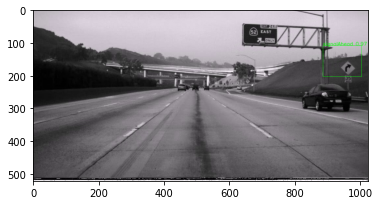

Running inference on sample_images/addedLane_1323817202.avi_image15.png
Inference took 70.1 ms (14.26 fps)
Inference + NMS took 85.4 ms (11.71 fps)


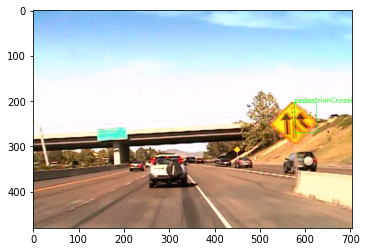

In [56]:
#parser = OptionParser()
#parser.add_option('-i', '--input_dir', dest='input_dir',
#help='Directory of input videos/images (ignored for "demo" mode). Will run inference on all videos/images in that dir')
#parser.add_option('-m', '--mode', dest='mode', default='image',
#help='Operating mode, could be "image", "video", or "demo"; "demo" mode displays annotated images from sample_images/')

# Get and parse command line options
#options, args = parser.parse_args()

input_dir = './sample_images/'

mode = 'demo'

if mode != 'video' and mode != 'image' and mode != 'demo':
    assert ValueError('Invalid mode: %s' % mode)
    
if mode != 'demo':
    input_files = glob.glob(input_dir + '/*.*')
else:
    input_files = []
    

generate_output(input_files, mode)